# ML-QuIC Demonstration Notebook

### Metrics Quick Reference
Accuracy = % correct
Precision = % identified positive which actually were
Recall = % of positive samples identified

## Universal Import of Data and Packages

In [ ]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [ ]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load data
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


## Supervised - Raw Data

### Multilayer Perceptron

In [ ]:
### MLP
from Models import MLP as MLP
imp.reload(MLP)

# Add MLP to list of supervised models
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw()), model_name = 'MLP', data_type = 'raw', tag='Supervised')

### Support Vector Machine

In [ ]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

### Train and Compare Supervised Models

In [ ]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

Epoch 1/500
59/59 [==============================] - 1s 4ms/step - loss: 0.9954 - val_loss: 0.7871
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 0.6286 - val_loss: 0.4595
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 0.3575 - val_loss: 0.2690
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 0.2334 - val_loss: 0.1963
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1875 - val_loss: 0.1662
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1664 - val_loss: 0.1498
Epoch 7/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1394
Epoch 8/500
59/59 [==============================] - 0s 3ms/step - loss: 0.1442 - val_loss: 0.1318
Epoch 9/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1258
Epoch 10/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1300 - val_loss: 0.1213
Epoch 11/

ValueError: X has 2 features, but StandardScaler is expecting 65 features as input.

29/29 [==============================] - 0s 1ms/step


MLP:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98       804
         pos       0.82      0.99      0.90       122

    accuracy                           0.97       926
   macro avg       0.91      0.98      0.94       926
weighted avg       0.98      0.97      0.97       926

SVM:
              precision    recall  f1-score   support

         neg       0.99      0.97      0.98       804
         pos       0.84      0.94      0.89       122

    accuracy                           0.97       926
   macro avg       0.92      0.96      0.93       926
weighted avg       0.97      0.97      0.97       926

-------- Results on False Positives for MLP --------
29/29 [==============================] - 0s 857us/step
Accuracy on False Positives: 0.07692307692307693
False Positives Account for 88.89% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 32.96875
Average RAF: 0.03314457154166667
Average MPR:

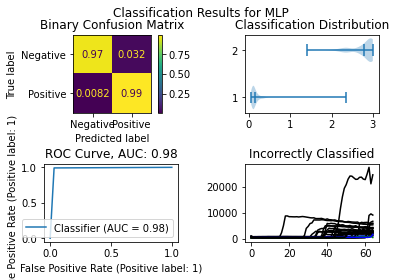

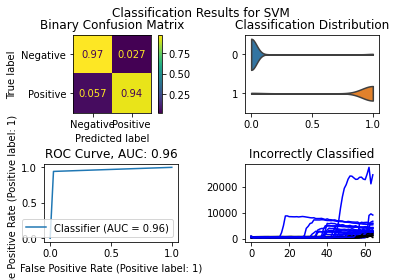

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

## Unsupervised - Analysis

### Create New Object

In [ ]:
raw_ml_quic = copy.copy(ml_quic)
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


### Add KMeans Model

In [ ]:
### Add KMeans to the list of models to test
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3), model_name='KMeans', data_type='analysis', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['KMeans'], train_type=3)

[{'KMeans': array([ 161, 5823, 8892, ..., 3455,  858, 1954])},
 {'KMeans': array([1902, 5384, 4138, ..., 4198, 5608, 8353])}]

### Train and Compare Unsupervised Models

KMeans:
              precision    recall  f1-score   support

         neg       0.94      0.99      0.96      7991
         pos       0.87      0.59      0.70      1273

    accuracy                           0.93      9264
   macro avg       0.90      0.79      0.83      9264
weighted avg       0.93      0.93      0.93      9264

-------- Results on False Positives for KMeans --------
Accuracy on False Positives: 0.5830258302583026
False Positives Account for 9.22% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.1053982300885
Average RAF: 0.033146525522123896
Average MPR: 8.577633678053097
Average MS: 742.1946902654868
Correctly Classified FP Characteristics:
Average Time to Threshold: 35.58272151898734
Average RAF: 0.034512750734177214
Average MPR: 8.027743369449366
Average MS: 575.868670886076
-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833

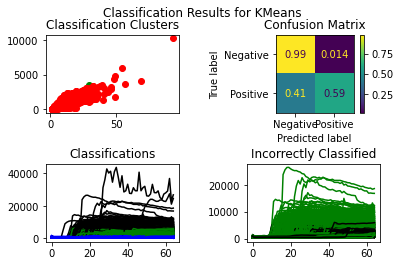

In [ ]:
### Get Unsupervised Scores and Plots
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised']);
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

### Add Supervised Learning Technique (SVM)

In [ ]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

In [ ]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

SVM:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.99       795
         pos       0.91      0.93      0.92       131

    accuracy                           0.98       926
   macro avg       0.95      0.96      0.95       926
weighted avg       0.98      0.98      0.98       926

-------- Results on False Positives for SVM --------
Accuracy on False Positives: 0.3333333333333333
False Positives Account for 57.14% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 31.125
Average RAF: 0.05150785608333334
Average MPR: 10.857491044
Average MS: 1090.9583333333333
Correctly Classified FP Characteristics:
Average Time to Threshold: 40.25
Average RAF: 0.025678756166666664
Average MPR: 5.609680101333333
Average MS: 351.4583333333333
-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.048363688274941

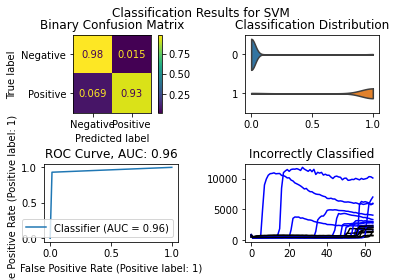

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])